In [2]:
import pandas as pd
import ijson
import numpy as np
import json
import io
import os

In [36]:
dirlist = os.listdir("/Users/xudou/Desktop/python_learning/Yelp_project")

from pprint import pprint
pprint(dirlist)

['.DS_Store',
 '.git',
 '.ipynb_checkpoints',
 'Dataset_Challenge_Dataset_Agreement.pdf',
 'LasVegas_tips_after2016.csv',
 'LasVegas_tips_after2017.csv',
 'Models.ipynb',
 'name_review_counts.png',
 'README.md',
 'yelp_academic_dataset_business.json',
 'yelp_academic_dataset_checkin.json',
 'yelp_academic_dataset_photo.json',
 'yelp_academic_dataset_review.json',
 'yelp_academic_dataset_tip.json',
 'yelp_academic_dataset_user.json',
 'yelp_data_processing.ipynb',
 'Yelp_Dataset_Challenge_Round_12.pdf']


In [3]:
file_tip, file_business = ['yelp_academic_dataset_tip.json','yelp_academic_dataset_business.json']

In [4]:
#file_business, file_review, 

### Data of short tips

We use these short tips to analyze the performances of businesses.

In [5]:
with open(file_tip) as f:
    raw_data_tip = f.readlines()
    
# remove '\n's in the original json file 
raw_data_tip = map(lambda x: x.rstrip(), raw_data_tip)

data_tip_string = "[" + ",".join(raw_data_tip) + "]"

data_tip = pd.read_json(data_tip_string)

In [6]:
data_tip.head()

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,2ThtBbeDqFkVi6LugUOcVA,2012-11-25,0,Don't use them! Double charged my boyfriend an...,M5n8mMFoeXjnJEV2gxyGGA
2,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg
3,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,oaYhjqBbh18ZhU0bpyzSuw
4,dAa0hB2yrnHzVmsCkN4YvQ,2016-10-12,0,Happy hour 5-7 Monday - Friday,ulQ8Nyj7jCUR8M83SUMoRQ


In [7]:
data_tip.groupby('business_id')

In [8]:
data_tip.iloc[100]['text']

'Order extra gravy. Its the best thing ever!'

In [9]:
data_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185348 entries, 0 to 1185347
Data columns (total 5 columns):
business_id    1185348 non-null object
date           1185348 non-null datetime64[ns]
likes          1185348 non-null int64
text           1185348 non-null object
user_id        1185348 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 45.2+ MB


### Data of business

In [10]:
with open(file_business) as f:
    raw_data_business = f.readlines()
    
# remove '\n's in the original json file 
raw_data_business = map(lambda x: x.rstrip(), raw_data_business)

data_business_string = "[" + ",".join(raw_data_business) + "]"

data_business = pd.read_json(data_business_string)

In [11]:
data_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB


In [12]:
data_business.groupby('city')

#### Count the number of different cities

In [13]:
data_business.index
lv = 0

In [14]:
cities = set()
for i in data_business.index:
    if data_business.iloc[i]['city'] is not '':
        cities.add(data_business.iloc[i]['city'])
        if data_business.iloc[i]['city'] == 'Las Vegas':
            lv += 1

In [15]:
print(lv)

28865


In [16]:
len(cities)

1110

#### Collect data from "Las Vegas"
We need to do a subset selection.

Merge business information dataset and tips dataset on "business_id"

In [17]:
merge_business_tips = pd.merge(data_tip[['business_id','text','date']],
                               data_business[['attributes','business_id','categories','city','name','stars','review_count']],on='business_id')

In [18]:
merge_business_tips.head()

,business_id,text,date,attributes,categories,city,name,stars,review_count
0,tJRDll5yqpZwehenzE2cSg,Get here early enough to have dinner.,2012-07-15,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Event Planning & Services, Hotels & Travel, Be...",Alburg,Ransom Bay Inn B & B,5.0,5
1,2ThtBbeDqFkVi6LugUOcVA,Don't use them! Double charged my boyfriend an...,2012-11-25,None,"Tours, Hotels & Travel, Town Car Service, Tran...",Las Vegas,Empire Limousine,2.0,5
2,jH19V2I9fIslnNhDzPmdkA,Great breakfast large portions and friendly wa...,2015-08-12,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...","American (Traditional), Breakfast & Brunch, Re...",Mooers,Sandi's Kountry Kitchen,5.0,7
3,dAa0hB2yrnHzVmsCkN4YvQ,Nice place. Great staff. A fixture in the tow...,2014-06-20,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...","American (Traditional), Venues & Event Spaces,...",Elizabeth,Rock Run Inn,4.5,7
4,dAa0hB2yrnHzVmsCkN4YvQ,Happy hour 5-7 Monday - Friday,2016-10-12,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...","American (Traditional), Venues & Event Spaces,...",Elizabeth,Rock Run Inn,4.5,7


We select business located in Las Vegas

In [19]:
LasVegas_business_tips = merge_business_tips.loc[merge_business_tips['city'] == 'Las Vegas']

In [20]:
LasVegas_business_tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419023 entries, 1 to 1185330
Data columns (total 9 columns):
business_id     419023 non-null object
text            419023 non-null object
date            419023 non-null datetime64[ns]
attributes      408812 non-null object
categories      418922 non-null object
city            419023 non-null object
name            419023 non-null object
stars           419023 non-null float64
review_count    419023 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 32.0+ MB


Reset the index of the DataFrame

In [21]:
LasVegas_business_tips = LasVegas_business_tips.reset_index(drop=True);


In [22]:
LasVegas_business_tips.head()

,business_id,text,date,attributes,categories,city,name,stars,review_count
0,2ThtBbeDqFkVi6LugUOcVA,Don't use them! Double charged my boyfriend an...,2012-11-25,None,"Tours, Hotels & Travel, Town Car Service, Tran...",Las Vegas,Empire Limousine,2.0,5
1,KPgyqG3MyFUDK7GRbUg51A,Valley of Fire Tour. Very nice!,2016-04-11,None,"Landmarks & Historical Buildings, Travel Servi...",Las Vegas,Pink Jeep Tours,4.5,136
2,KPgyqG3MyFUDK7GRbUg51A,Hoover Dam Upgrade tour with Kegan was excelle...,2015-03-23,None,"Landmarks & Historical Buildings, Travel Servi...",Las Vegas,Pink Jeep Tours,4.5,136
3,KPgyqG3MyFUDK7GRbUg51A,The pink bus is in the house.,2010-08-20,None,"Landmarks & Historical Buildings, Travel Servi...",Las Vegas,Pink Jeep Tours,4.5,136
4,KPgyqG3MyFUDK7GRbUg51A,The truck seating is two on the driver side an...,2015-05-12,None,"Landmarks & Historical Buildings, Travel Servi...",Las Vegas,Pink Jeep Tours,4.5,136


In [23]:
LasVegas_business_tips.dtypes

business_id             object
text                    object
date            datetime64[ns]
attributes              object
categories              object
city                    object
name                    object
stars                  float64
review_count             int64
dtype: object

In [24]:
business_names = set()


Select name and review_counts to form a new dataframe (for making a plot)

In [25]:
name_review_counts = LasVegas_business_tips[['name','review_count']].drop_duplicates()

In [26]:
name_review_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20470 entries, 0 to 419020
Data columns (total 2 columns):
name            20470 non-null object
review_count    20470 non-null int64
dtypes: int64(1), object(1)
memory usage: 479.8+ KB


We only consider short reviews posted after 2017-1-1. There are 65280 of them.

In [27]:
LasVegas_business_tips_after2017 = LasVegas_business_tips.loc[LasVegas_business_tips['date']>='2017-1-1']

In [28]:
LasVegas_business_tips_after2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65280 entries, 8 to 419022
Data columns (total 9 columns):
business_id     65280 non-null object
text            65280 non-null object
date            65280 non-null datetime64[ns]
attributes      63612 non-null object
categories      65257 non-null object
city            65280 non-null object
name            65280 non-null object
stars           65280 non-null float64
review_count    65280 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 5.0+ MB


In [29]:
import matplotlib.pyplot as plt

% matplotlib inline

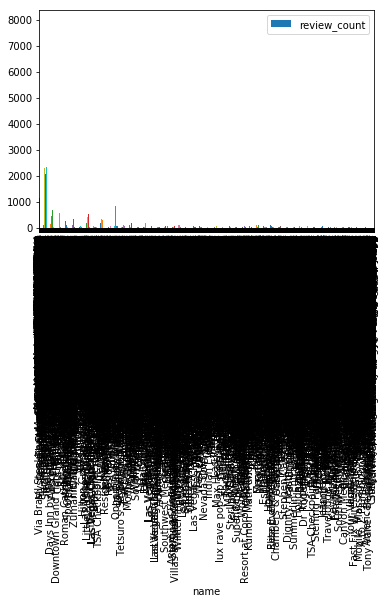

In [30]:
name_review_counts.plot(kind='bar',x='name',y='review_count')

In [31]:
plt.savefig('name_review_counts.png')

<Figure size 432x288 with 0 Axes>

In [56]:
export_to_csv = LasVegas_business_tips_after2017.to_csv(r'LasVegas_tips_after2017.csv')

In [32]:
LasVegas_business_tips_after2016 = LasVegas_business_tips.loc[LasVegas_business_tips['date']>='2016-1-1']

In [33]:
LasVegas_business_tips_after2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111831 entries, 1 to 419022
Data columns (total 9 columns):
business_id     111831 non-null object
text            111831 non-null object
date            111831 non-null datetime64[ns]
attributes      109022 non-null object
categories      111800 non-null object
city            111831 non-null object
name            111831 non-null object
stars           111831 non-null float64
review_count    111831 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 8.5+ MB


In [34]:
LasVegas_business_tips_after2017.to_csv(r'LasVegas_tips_after2016.csv')